<a href="https://colab.research.google.com/github/Bhuvan588/Microsoft-Stock-Price-prediction-using-LSTM/blob/main/Microsoft_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING THE DATA**

In [ ]:
import pandas as pd

df = pd.read_csv("MSFT.csv")

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060055,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062199,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063272,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061663,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060591,47894400


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9665,2024-07-22,441.790009,444.600006,438.910004,442.940002,442.940002,15808800
9666,2024-07-23,443.899994,448.390015,443.100006,444.850006,444.850006,13107100
9667,2024-07-24,440.450012,441.480011,427.589996,428.899994,428.899994,26805800
9668,2024-07-25,428.799988,429.799988,417.510010,418.399994,418.399994,29943800
9669,2024-07-26,418.200012,428.920013,417.269989,425.269989,425.269989,23566500


In [ ]:
opn = df["Open"]

<Axes: >

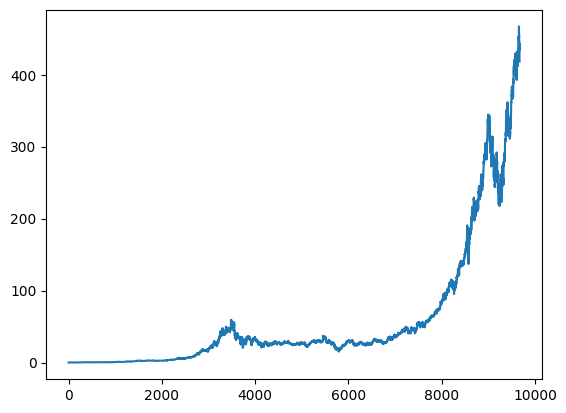

In [ ]:
opn.plot()

In [ ]:
import matplotlib.pyplot as plt

#Coverting into numpt array
ds = opn.values

In [ ]:
ds

array([8.85420000e-02, 9.72220000e-02, 1.00694000e-01, ...,
       4.40450012e+02, 4.28799988e+02, 4.18200012e+02])

In [ ]:
len(ds)

9670

Scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range=(0,1))
ds_scaled = scaler.fit_transform(np.array(ds).reshape(-1,1))

In [ ]:
ds_scaled

array([[0.00000000e+00],
       [1.85902484e-05],
       [2.60263478e-05],
       ...,
       [9.43136996e-01],
       [9.18185747e-01],
       [8.95483422e-01]])

In [ ]:
len(ds_scaled)

9670

Defining training and test data. NOTE: We cannot use train_test_split as it is sequential data.

In [ ]:
#Usig 70% for training
train_size = int(len(ds_scaled) * 0.70)
test_size = len(ds_scaled) - train_size

In [ ]:
train_size, test_size

(6769, 2901)

Splitting data into training and test sets

In [ ]:
ds_train = ds_scaled[0: train_size, :]
ds_test = ds_scaled[train_size: len(ds_scaled), :1]

In [ ]:
len(ds_train), len(ds_test)

(6769, 2901)

Creating dataset in form of time series

In [ ]:
def create_ds(dataset, stamp):
  X_train =[]
  y_train =[]

  for i in range(len(dataset) -  stamp - 1):
    a = dataset[i : (i+ stamp), 0]
    X_train.append(a)
    y_train.append(dataset[i+stamp, 0])

  return np.array(X_train), np.array(y_train)

Now we take pass 100 days data to create record for training

In [ ]:
time_stamp = 100
X_train, y_train = create_ds(ds_train, time_stamp)
X_test, y_test = create_ds(ds_test, time_stamp)

In [ ]:
X_train.shape, y_train.shape

((6668, 100), (6668,))

In [ ]:
X_test.shape, y_test.shape

((2800, 100), (2800,))

Reshaping data in order to fed into the LSTM model

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

**CREATING THE MODEL**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape= (X_train.shape[1], 1), return_sequences=True))
model.add(LSTM(50,  return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1, activation="linear"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Compiling the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
#Fitting the model
model.fit(X_train, y_train, validation_data =(X_test, y_test), epochs = 100, batch_size = 64)

Epoch 1/100
105/105 [==============================] - 30s 217ms/step - loss: 1.2176e-04 - val_loss: 0.0064
Epoch 2/100
105/105 [==============================] - 23s 221ms/step - loss: 1.0388e-05 - val_loss: 0.0077
Epoch 3/100
105/105 [==============================] - 21s 196ms/step - loss: 9.1026e-06 - val_loss: 0.0072
Epoch 4/100
105/105 [==============================] - 40s 386ms/step - loss: 8.1712e-06 - val_loss: 0.0058
Epoch 5/100
105/105 [==============================] - 23s 220ms/step - loss: 7.5936e-06 - val_loss: 0.0051
Epoch 6/100
105/105 [==============================] - 20s 194ms/step - loss: 7.4437e-06 - val_loss: 0.0058
Epoch 7/100
105/105 [==============================] - 22s 213ms/step - loss: 6.5955e-06 - val_loss: 0.0069
Epoch 8/100
105/105 [==============================] - 20s 195ms/step - loss: 5.8750e-06 - val_loss: 0.0040
Epoch 9/100
105/105 [==============================] - 22s 209ms/step - loss: 5.2393e-06 - val_loss: 0.0043
Epoch 10/100
105/105 [======

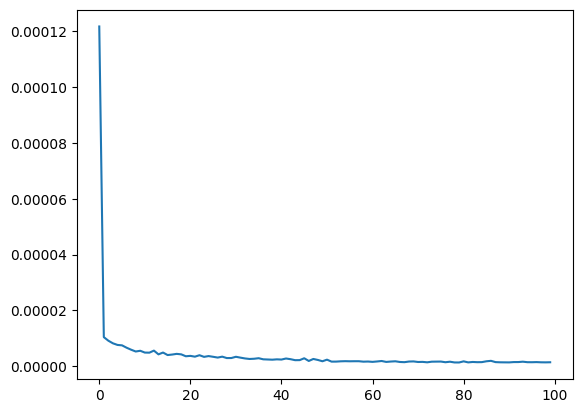

In [ ]:
#Plotting the loss
loss = model.history.history['loss']
plt.plot(loss)

In [ ]:
#Predicting
train_predict= model.predict(X_train)
test_predict = model.predict(X_test)

88/88 [==============================] - 3s 36ms/step


In [ ]:
#Inverse transform to get actual values

train_predict = scaler.inverse_transform(train_predict)
test_predict =  scaler.inverse_transform(test_predict)

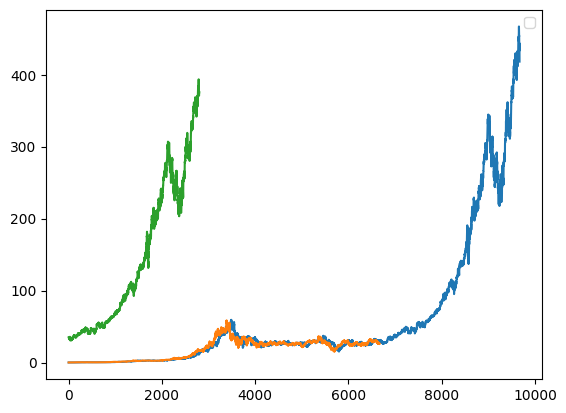

In [ ]:
plt.plot(scaler.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)
plt.legend()

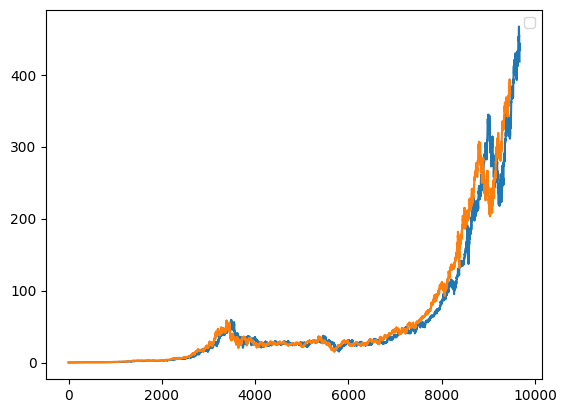

In [ ]:
test = np.vstack((train_predict, test_predict))

plt.plot(scaler.inverse_transform(ds_scaled))
plt.plot(test)
plt.legend()

**PREDICTING NEXT 30 DAYS DATA USING A SLIDING WINDOW**

In [ ]:
len(ds_test)

2901

In [ ]:
#Getting last 100 day records

fut_inp = ds_test[2801 :]
fut_inp = fut_inp.reshape(1, -1)
fut_inp.shape

(1, 100)

In [ ]:
#Predicting next 30 days using current data
tmp_inp = list(fut_inp)
tmp_inp = tmp_inp[0].tolist()
lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[[0.7699140310287476], [0.6815392374992371], [0.6004112362861633], [0.5299369692802429], [0.4686397910118103], [0.41456907987594604], [0.3660551905632019], [0.3220522403717041], [0.2821218967437744], [0.24622654914855957], [0.21448107063770294], [0.18696099519729614], [0.16360773146152496], [0.14422018826007843], [0.12849439680576324], [0.11607567965984344], [0.10659994930028915], [0.09971806406974792], [0.09510548412799835], [0.09246302396059036], [0.09151382744312286], [0.09199966490268707], [0.09367816150188446], [0.09632125496864319], [0.09971506148576736], [0.10366026312112808], [0.10797318816184998], [0.11248669028282166], [0.11705105751752853], [0.12153467535972595]]


In [ ]:
len(ds_scaled)

9670

Now we know that by default , the plot starts from extreme left hand side. But as it is future prediction we need to plot after the current graph ends so we need a dummy plan to plot one curve after the other

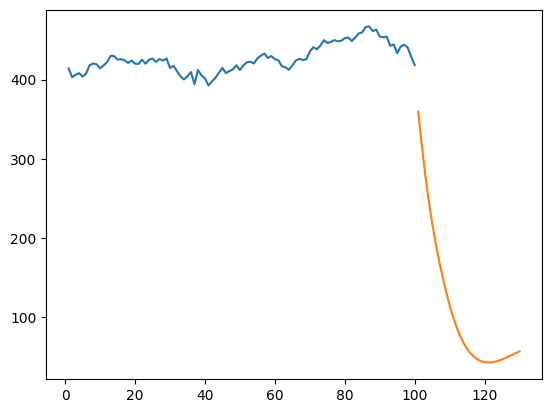

In [ ]:
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

plt.plot(plot_new, scaler.inverse_transform(ds_scaled[9570:]))
plt.plot(plot_pred, scaler.inverse_transform(lst_output))

In [ ]:
ds_new = ds_scaled.tolist()

len(ds_new)

9670

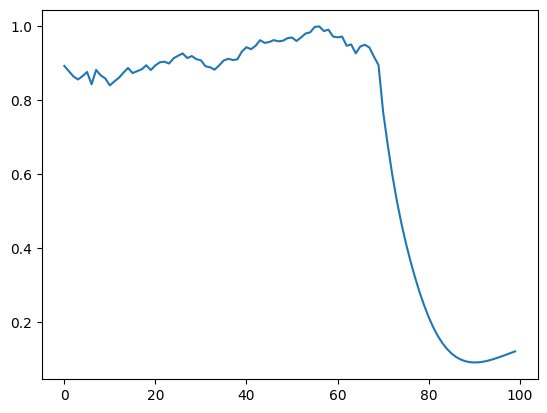

In [ ]:
#Entends helps us to fill the missing value with approx value
ds_new.extend(lst_output)
plt.plot(ds_new[9600:])